In [1]:
from __future__ import print_function
import sdm as sdmlib
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
bits, radius = 1000, 451

sample = 1000000
scanner_type = sdmlib.SDM_SCANNER_OPENCL

address_space = sdmlib.AddressSpace.init_random(bits, sample)
address_space.opencl_init();

In [ ]:
counter = []

In [6]:
for i in range(5000):
    if i%100 == 0:
        print(i, end=' ')
    bs = sdmlib.Bitstring.init_random(bits)
    result = address_space.scan_opencl2(bs, radius)
    counter.append(len(result))
print('')

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 


In [4]:
mu = 500
sigma = (1000**(0.5))/2.0
x = np.linspace(0, 1000, 1000)
y = mlab.normpdf(x, mu, sigma)

NameError: name 'np' is not defined

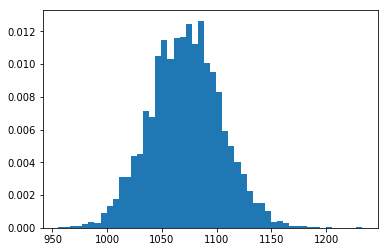

In [9]:
plt.hist(counter, bins=50, density=True)
plt.plot(x, y, 'r', linewidth=2.0)
plt.show()